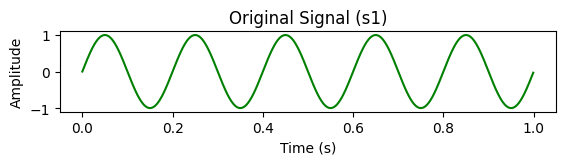

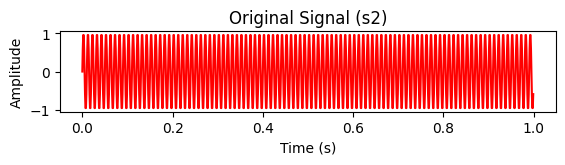

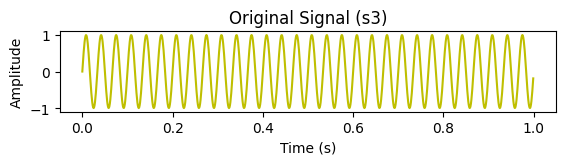

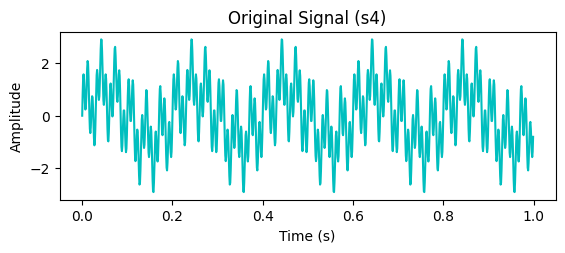

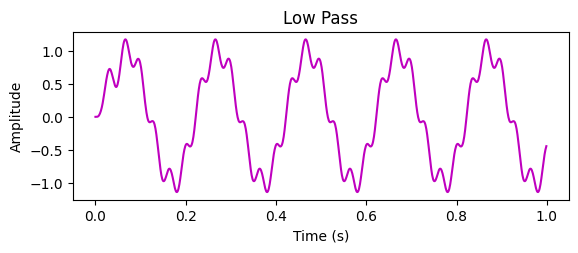

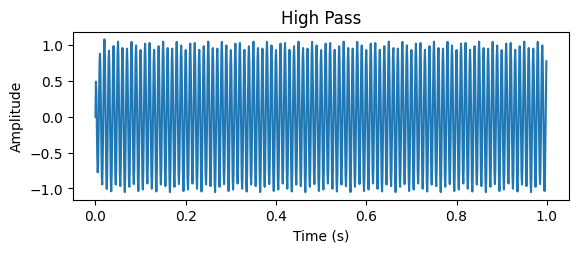

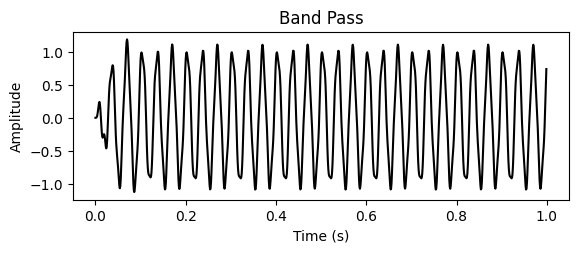

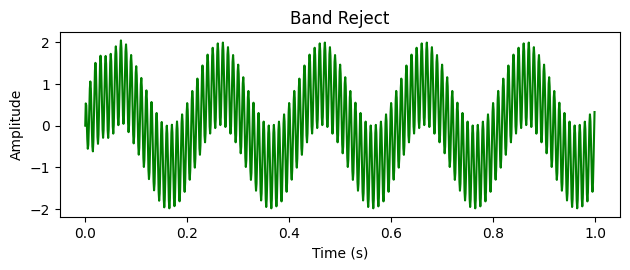

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define the sampling frequency and duration
fs = 1000 # Sampling frequency (Hz)
duration = 1 # Duration of the signal (seconds)
t = np.linspace(0, duration, int(fs * duration), endpoint=False) # Time vector

# Generate the signals
s1 = np.sin(2 * np.pi * 5 * t) # Low-frequency signal (5 Hz sine wave)
s2 = np.sin(2 * np.pi * 100 * t) # High-frequency signal (100 Hz sine wave)
s3 = np.sin(2 * np.pi * 30 * t) # Mid-range frequency signal (30 Hz sine wave)

# Add the signals together
s4 = s1 + s2 + s3

# Plot the original and filtered signals
plt.figure()
plt.subplot(4, 1, 1)
plt.plot(t, s1,'g')
plt.title('Original Signal (s1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
plt.subplot(4, 1, 2)
plt.plot(t, s2,'r')
plt.title('Original Signal (s2)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
plt.subplot(4, 1, 3)
plt.plot(t, s3,'y')
plt.title('Original Signal (s3)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s4,'c')
plt.title('Original Signal (s4)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Design the low-pass filter
fc = 20 # Cutoff frequency (Hz)
order = 4 # Filter order
b, a = signal.butter(order, fc, btype='low', fs=fs)

# Apply the filter to the combined signal
filtered_signal = signal.lfilter(b, a, s4)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal,'m')
plt.title('Low Pass')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Design the high-pass filter
fc = 60 # Cutoff frequency (Hz)
order = 4 # Filter order
b, a = signal.butter(order, fc, btype='high', fs=fs)

# Apply the filter to the combined signal
filtered_signal = signal.lfilter(b, a, s4)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal)
plt.title('High Pass')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Design the band-pass filter
fc_low = 20 # Lower cutoff frequency (Hz)
fc_high = 70 # Upper cutoff frequency (Hz)
order = 4 # Filter order
b, a = signal.butter(order, [fc_low, fc_high], btype='bandpass', fs=fs)

# Apply the filter to the combined signal
filtered_signal = signal.lfilter(b, a, s4)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal,'k')
plt.title('Band Pass')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Design the band-reject filter
fc_low = 20 # Lower cutoff frequency (Hz)
fc_high = 70 # Upper cutoff frequency (Hz)
order = 4 # Filter order
b, a = signal.butter(order, [fc_low, fc_high], btype='bandstop', fs=fs)

# Apply the filter to the combined signal
filtered_signal = signal.lfilter(b, a, s4)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal,'g')
plt.title('Band Reject')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()